# THE SHAP VALUE: Model Explainability #

In [1]:
%cd C:\Users\Max\Documents\Business\ModelExplainabiliy

C:\Users\Max\Documents\Business\ModelExplainabiliy


### Introduction ###
Explainability in modeling is the ability to interpret every piece of output/prediction in terms of the features that were used to make that prediction. One common method to accomplish this is to calculate the SHAP value for each feature that was used to predict a particular observation.

### Example
Let us consider a model that tries to predict a response using 3 independent variables, Age, Gender and Job. In Diagram 1 below, we can see an illustration of the Power set of these 3 features, which consists of: 
<br>
(1) $PowerSet(n)=2^{n}$
<br>
possible feature models where n is the total number of independent features in the model. So in the case of 3 independent features, we have 8 possible models to consider. 

### Diagram 1

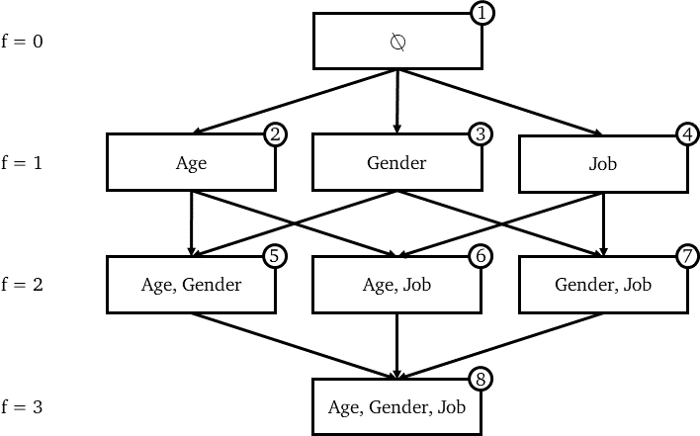

In [2]:
from IPython.display import Image
Image(filename='SHAP_FeaturePowerSetExample.png',width=800, height=400)

## Goal
SHAP requires to train a distinct predictive model for each distinct cell in the power set. Each of the models is equivalent in terms of the data set used (training data) and the hyper parameters, so the only thing that is different is the particular features included in each model. Then, each of these models is scored on new observations. As an example, Diagram 2 below illustrates predictions for some observation for all trained models above. To calculate the SHAP value for one feature, we need to calculate the weighted average of the marginal contributions of that feature, where each marginal contribution is the difference between a model prediction with that feature and a model prediction with all but that one feature present. As an example, if we consider the feature 'Age', then there are 4 marginal contributions needed to be calculated, since there are 4 possible models with the feature 'Age' present. This can be seen in diagram 3 below. The reason for taking the weighted average across all marginal contributions, is to eliminate the effect of having a different number of variables when computing the difference, so that the contribution is truly because of adding the variable in question and not because of the other variables present. 

### Diagram 2

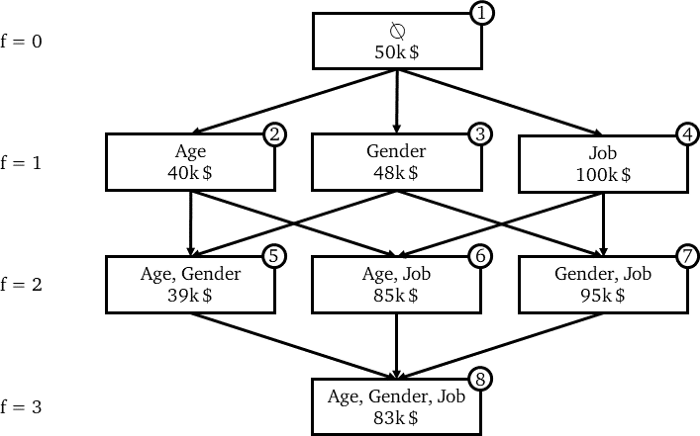

In [3]:
from IPython.display import Image
Image(filename='SHAP_FeaturePowerSetExample_values.png',width=800, height=400)

### Diagram 3

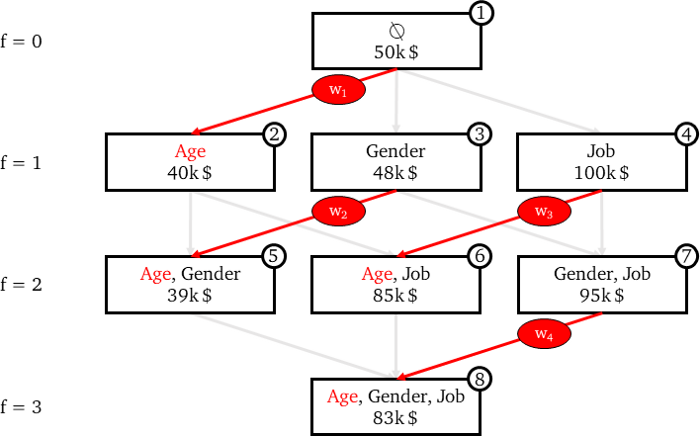

In [4]:
from IPython.display import Image
Image(filename='SHAP_FeaturePowerSetExample_weights.png',width=800, height=400)

### Computation of the weights
The question now is how do we calculate the weights in  diagram 3 abovem, where each of the weights is associated with an edge going into the node from one or more nodes from the level above? To do this, we need to consider the following points: 
1. Given a single row, all incoming edges must have the same weight across all nodes in that row. The intuition behind this is that given the same number of features, there is no reason why removal of one feature from any such model should be weighed more in one instance than another. More importantly, given this constraint is true, we can show the following: 
2. The sum of the weights on each feature row for is the same across all rows, and the sum of all weights across all rows for the feature = 1. 
</br>

The following outcomes allow us to weigh the marginal contribution for each number of features equally. As an example, diagram 4 below shows that for the green row associated with 2 features in each model, the weight of each edge is 1/6 with all edges on that row adding up to 1. In addition, we see that the sum of the edges on the orange and red rows is also 1. Finally, we can observe that w1+w2+w3+w4 - the sum of the weights for the Age variable from Diagram 3 - is also equal to 1. 

#### Theorem 1
If point 1 above is true, then point 2 above also has to be true. 

#### Proof of Theorem 1
We first consider the following formulas from combinatorics, where F is the total number of independent features in the model and f is the total number of features for each model in a single row in Diagram 3:  

(2) Number of Marginal Contributions for a single feature as a function of n=$2^{n-1}$, which would also be the number of weights in the single feature weighted average computation. 
<br>
(3) Total number of incoming edges for a single feature row in Diagram 3 is: ${f \choose f-1}{F \choose f}$
Given condition 1 above is true, based on this, the weight for each node on a single row can be calculated as a reciprocal of this to make sure all weights would be equal. 
<br>
(4) Total number of marginal contributions for a given feature from some feature row in Diagram 3 is: 
${F \choose f}-{F-1 \choose f}$
<br>
(5) Total number of outcoming edges for a single node in a single feature row is: ${F-f \choose 1}=F-f$
<br>
<br>
Given the above, we then have the following result for a marginal contribution for a single feature: 
<br>
$\sum_{f=1}^{F-1} [{F \choose f}-{F-1 \choose f}]*\frac{1}{f \choose f-1}\frac{1}{F \choose f} = $ <br><br>
$\sum_{f=1}^{F-1} \frac{F!}{f!(F-f)!}\frac{1}{F!}(f-1)!(F-f)!-\frac{(F-1)!}{f!}\frac{1}{(F-1-f)!}\frac{1}{F!}(f-1)!(F-f)! = $
<br><br>
$\sum_{f=1}^{F-1} [\frac{1}{f}-\frac{1}{F}\frac{1}{f}(F-f)] = $
<br><br>
$\sum_{f=1}^{F-1} \frac{1}{F}$, thus proving that the sum of the weights on each row is the same.
<br><br>
Now, we can see from Diagram 3 that the number of incoming edges and thus weights in the last feature row is equal to F, and thus each weight has to be equal to 1 / F to follow the pattern of taking the reciprocal for weight calculation. 
<br><br>
Thus, 
$\sum_{f=1}^{F-1} \frac{1}{F} + \frac{1}{F} = (F-1)\frac{1}{F}+\frac{1}{F} = 1$, <br><br>
**<font color='red'> End of proof </font>**


### Diagram 4

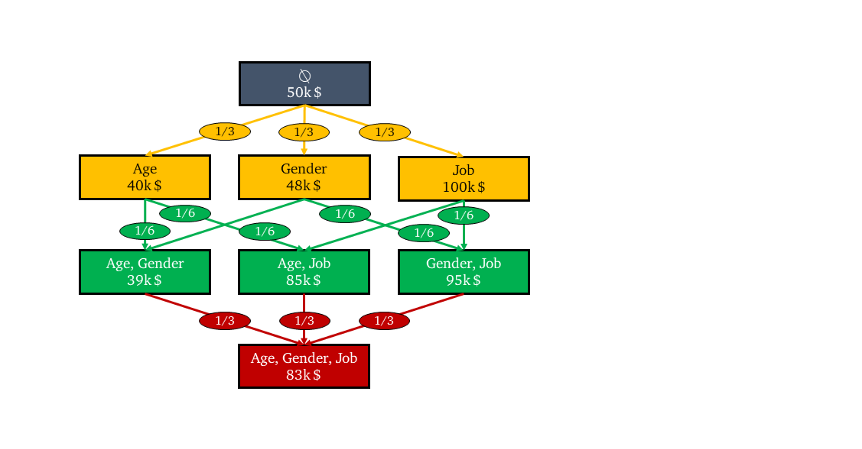

In [8]:
from IPython.display import Image
Image(filename='SHAP_FeaturePowerSetExample_weights_multifeature3.png',width=1000, height=600)

#### Result 1
<br>
Given the structure above, it can be easily shown mathematically that if we add up all the SHAP values, then we get the difference between the Null model (just taking the average of the response) and the model with all variables. 

#### Result 2
<br>
Based on result 1 above, we can see that the final prediction using all variables minus the null prediction can be attributed to each of the variables in the model, i.e. we can use the SHAP value of some variable and divide it by the total SHAP value to see approximately what proportion of the total SHAP value is attributed to that variable. 

#### Proof of Result 1 above
To prove result 1 above, we need to consider the following facts: <br>
Given any node in the graph above, it has: <br>
(6) ${f \choose f-1}$ incoming edges and ${F-f}$ outgoing edges <br>
(7) Weight of each incoming edge is $\frac{1}{f \choose f-1}\frac{1}{F \choose f}$ <br><br>
(8) Weight of each outgoing edge is $\frac{1}{f+1 \choose f}\frac{1}{F \choose f+1}$ <br><br>
Thus, when we add up all prediction model differences across all nodes, the number of **<font color='red'> positive terms for a single node is: </font>**<br>
$\frac{1}{f \choose f-1}\frac{1}{F \choose f}{f \choose f-1}=\frac{1}{F \choose f}$, since all incoming edges are assumed to have the same weight on the same row <br><br>
the number of **<font color='red'> negative terms for a single node is: </font>**<br>
$\frac{1}{f+1 \choose f}\frac{1}{F \choose f+1}{(F-f)}=\frac{f!}{(f+1)!}{(f+1)!(F-f-1)!}\frac{1}{F!}(F-f)=\frac{f!}{F!}(F-f)!=\frac{1}{F \choose f}$<br><br>
Therefore, since for each node the number of positive terms is the same as the number of negative terms, they cancel out when added up, yielding the desired result<br>
**<font color='red'> End of Proof </font>**


#### Proof of Result 2 above
To prove result 2 above, we can consider the following two random variables: <br>
1. C = Change in model prediction
2. f = Particular feature that is being added to the current model, which can be assumed to have a Uniform distribution over the number of features <br><br>

***Furthermore, we need to observe/revisit the following two important facts***: <br><br>
1. Given a single row and feature, for any given node, there has to be only 1 incoming edge. 
2. The set of all incoming edges consists of disjoint sets of incoming edges, each of which pertains to a distinct feature. 
3. Based on Theorem 1 above, for a given feature $f$, C has the following distribution across feature levels $i$: <br>
\begin{equation}
 Probability = 
 \begin{cases}
    \frac{1}{f \choose f-1}\frac{1}{F \choose f}, \forall i\neq{F}\\
    \frac{1}{F}, i = F\\
 \end{cases}
\end{equation}

Then, we can define the following expected value of the change in model prediction:  <br>
$E(C) = E(E(C | f)) = \frac{1}{F}\sum_{f=1}^{F} E(C|f)$, is proportional to the total SHAP value, which based on Result 1 above is the difference between the full model and the Null model. <br>
Therefore, given the fact that all incoming edges on a single feature row for a single feature disjointly define the inner expectation above, we can see that the total SHAP value can be broken down into individual expectations (expected marginal feature contributions), each of which can be attributed to a single feature in the model. <br>
**<font color='red'> End of Proof </font>**

In [2]:
!pip install catboost

In [3]:
!pip install shap

  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
import shap
from scipy.interpolate import interp1d
shap.initjs()

In [5]:
!kaggle competitions download -c titanic

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
%cd C:\Users\Max\Documents\Business\ModelExplainabiliy\TitanicDataSet

C:\Users\Max\Documents\Business\ModelExplainabiliy\TitanicDataSet


In [7]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [8]:

train_data.shape, test_data.shape

((891, 12), (418, 11))

In [9]:
X_all=pd.concat([train_data[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']],
                 test_data[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
                ]).set_index('PassengerId')
y_train=train_data[['PassengerId','Survived']].set_index('PassengerId')['Survived']

In [10]:
X_all.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [37]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [38]:
y_train.mean()

0.3838383838383838

In [11]:
num_columns=['Age','SibSp','Parch','Fare']
cat_columns=list(filter(lambda x:x not in num_columns,X_all.columns))

In [12]:
# categorical features: finn nan's with string
X_all[cat_columns]=X_all[cat_columns].astype(str)
X_all[cat_columns]=X_all[cat_columns].fillna('NAN')

In [13]:
# data for catboost
X_train=X_all.iloc[:len(train_data),:]
X_test=X_all.iloc[len(train_data):]

In [60]:
intp

In [14]:
# data for logreg
X_train_lor=X_train.copy()
for col in num_columns:
    X_train_lor[col]=X_train_lor[col].fillna(X_train_lor[col].median())
X_train_lor=pd.get_dummies(X_train_lor)

In [15]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, 
                                              y_train, 
                                              test_size=.2, 
                                              random_state=4321)
X_trn_lor = X_train_lor.loc[X_trn.index,:]
X_val_lor = X_train_lor.loc[X_val.index,:]

In [16]:
lor = LogisticRegression(random_state=0, solver='lbfgs',max_iter=500).fit(X_trn_lor,y_trn)

In [17]:
print('accuracy:',accuracy_score(y_val,lor.predict(X_val_lor)))

accuracy: 0.8156424581005587


In [18]:
lor_coef = pd.Series(lor.coef_[0], index = X_trn_lor.columns)
lor_coef = pd.DataFrame({'exp(β)':lor_coef.apply(lambda x:np.exp(x))}).round(3)
lor_coef.style.apply(lambda x: ["background:orangered" if v<1 else "background:lightgreen"
                                for v in x], axis = 1)

,exp(β)
Age,0.961000
SibSp,0.692000
Parch,0.913000
Fare,1.003000
Pclass_1,2.562000
Pclass_2,0.996000
Pclass_3,0.399000
Sex_female,3.706000
Sex_male,0.274000
Embarked_C,1.314000


In [19]:
cat_features=[X_trn.columns.to_list().index(col) for col in cat_columns]
cat = CatBoostClassifier(cat_features=cat_features,silent=True).fit(X_trn,y_trn)
probas_cat = pd.Series(cat.predict_proba(X_all)[:,1],index=X_all.index)

In [20]:
print('accuracy:',accuracy_score(y_val,cat.predict(X_val)))

accuracy: 0.8770949720670391


In [35]:
type(probas_cat)

pandas.core.series.Series

In [36]:
probas_cat.iloc[0] #this is pred probability of survival for individual 1

0.1293760495375863

In [48]:
y_trn.mean()

0.3806179775280899

In [21]:
def shap2deltaprob(features, 
                   shap_df, 
                   shap_sum,
                   probas,
                   func_shap2probas):
    '''
    map shap to Δ probabilities
    --- input ---
    :features: list of strings, names of features
    :shap_df: pd.DataFrame, dataframe containing shap values
    :shap_sum: pd.Series, series containing shap sum for each observation
    :probas: pd.Series, series containing predicted probability for each observation
    :func_shap2probas: function, maps shap to probability (for example interpolation function)
    --- output ---
    :out: pd.Series or pd.DataFrame, Δ probability for each shap value
    '''
    # 1 feature
    if type(features) == str or len(features) == 1:
        return probas - (shap_sum - shap_df[features]).apply(func_shap2probas)
    # more than 1 feature
    else:
        return shap_df[features].apply(lambda x: shap_sum - x).apply(func_shap2probas)\
                .apply(lambda x: probas - x)

In [22]:
def partial_deltaprob(feature, X, shap_df, shap_sum, probas, func_shap2probas,
                      cutoffs = None
                     ):
    '''
    return univariate analysis (count, mean and standard deviation) of shap values based on the original feature
    --- input ---
    :feature: str, name of feature
    :X: pd.Dataframe, shape (N, P)
    :shap_df: pd.DataFrame, shape (N, P)
    :shap_sum: pd.Series, series containing shap sum for each observation
    :probas: pd.Series, series containing predicted probability for each observation
    :func_shap2probas: function, maps shap to probability (for example interpolation function)
    :cutoffs: list of floats, cutoffs for numerical features
    --- output ---
    :out: pd.DataFrame, shape (n_levels, 3)
    '''
    dp_col = shap2deltaprob(feature, shap_df, shap_sum, probas, func_shap2probas)
    dp_col_mean = dp_col.mean()
    dp_col.name = 'DP_' + feature
    out = pd.concat([X[feature], dp_col], axis = 1)
    if cutoffs:
        intervals = pd.IntervalIndex.from_tuples(list(zip(cutoffs[:-1], cutoffs[1:])))
        out[feature] = pd.cut(out[feature], bins = intervals)
        out = out.dropna()   
    out = out.groupby(feature).describe().iloc[:, :3]
    out.columns = ['count', 'mean', 'std']
    out['std'] = out['std'].fillna(0)
    return out

### Shap on Catboost

In [23]:
shap_df = cat.get_feature_importance(data = Pool(X_all, cat_features=cat_features), 
                                  type = 'ShapValues')
shap_df = pd.DataFrame(shap_df[:,:-1], columns = X_all.columns, index = X_all.index)
shap_sum = shap_df.sum(axis = 1)

In [24]:
# show shap
temp = shap_df.head().round(2)
temp.style.apply(lambda x:["background:orangered" if v<0 else "background:lightgreen"
                           for v in x], axis = 1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,-0.310000,-0.700000,0.120000,0.030000,-0.050000,-0.360000,-0.100000
2,1.480000,2.180000,0.110000,0.020000,0.090000,0.670000,0.740000
3,-0.790000,1.560000,0.130000,0.120000,-0.050000,-0.080000,-0.180000
4,1.330000,2.070000,0.160000,-0.060000,0.090000,0.540000,-0.190000
5,-0.360000,-0.670000,0.010000,0.070000,-0.050000,-0.240000,-0.090000


In [44]:
shap_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,-0.314556,-0.696812,0.123071,0.027755,-0.053260,-0.363276,-0.098993
2,1.477434,2.178161,0.109936,0.017840,0.086789,0.673814,0.744222
3,-0.792130,1.558152,0.126959,0.116190,-0.046433,-0.079041,-0.178851
4,1.334240,2.074725,0.164884,-0.060366,0.094487,0.542537,-0.189964
5,-0.355747,-0.673671,0.007510,0.074443,-0.054385,-0.238253,-0.088198


In [45]:
shap_df.iloc[0,:]

Pclass     -0.314556
Sex        -0.696812
Age         0.123071
SibSp       0.027755
Parch      -0.053260
Fare       -0.363276
Embarked   -0.098993
Name: 1, dtype: float64

In [46]:
shap_df.iloc[0,:].sum() #this is the total SHAP value for the first individual

-1.3760701407906328

In [47]:
probas_cat.iloc[0]

0.1293760495375863

In [52]:
total_shap=1 / (1+np.exp(-shap_df.iloc[0,:].sum()))
total_shap

0.20164089401710206

In [56]:
intp(shap_df.iloc[0,:].sum()) #note this is exactly equal to the prediction of the model for first observation

array(0.12937605)

In [ ]:
#using the interpolation function, we can see that the total SHAP maps exactly to the predicted probability when converted into
#a probability

In [57]:
intp(shap_df.iloc[0,1:].sum())

array(0.16911269)

In [59]:
intp

In [58]:
0.12937605 - 0.16911269 #this matches exactly: just the difference in probability, i.e. the table below shows 
#the ABSOLUTE decrease in probability of survival when including the first variable in the model

-0.03973664000000002

In [ ]:
#the above is also the sigmoid of the full model shap value

In [51]:
total_shap_nopclass=1 / (1+np.exp(-shap_df.iloc[0,1:].sum()))
total_shap_nopclass

0.2570201244707524

In [ ]:
#the above is the sigmoid of the total shap without the p class

In [53]:
total_shap - total_shap_nopclass

-0.05537923045365034

In [25]:
# build interpolation function to map shap into probability
shap_sum_sort = shap_sum.sort_values()
probas_cat_sort = probas_cat[shap_sum_sort.index]

intp = interp1d(shap_sum_sort,
                probas_cat_sort, 
                bounds_error = False, 
                fill_value = (0, 1))

In [61]:
intp(.38)

array(0.46246657)

In [55]:
intp(100)

array(1.)

In [26]:
# show Δ probabilities
temp = shap2deltaprob(X_all.columns.to_list(),
                      shap_df,
                      shap_sum,
                      probas_cat,
                      func_shap2probas=intp).head()\
        .applymap(lambda x:('+'if x>0 else '')+str(round(x*100,2))+'%')

temp.style.apply(lambda x: ["background:orangered" if float(v[:-1])<0 else "background:lightgreen"
                                for v in x], axis = 1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,-3.97%,-10.04%,+1.32%,+0.31%,-0.61%,-4.67%,-1.16%
2,+2.78%,+6.2%,+0.1%,+0.02%,+0.08%,+0.81%,+0.92%
3,-18.09%,+34.31%,+3.16%,+2.89%,-1.15%,-1.95%,-4.39%
4,+7.81%,+17.36%,+0.54%,-0.18%,+0.3%,+2.14%,-0.53%
5,-4.71%,-9.93%,+0.09%,+0.85%,-0.65%,-3.03%,-1.06%


In [ ]:
#let us verify the first number above: 
#pred probability of full model: 


The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


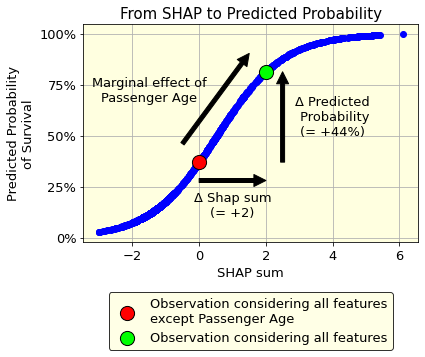

In [27]:
plt.scatter(0,intp(0),s=200,fc='red',ec='black',zorder=3,label='Observation considering all features\nexcept Passenger Age')
plt.scatter(2,intp(2),s=200,fc='lime',ec='black',zorder=3,label='Observation considering all features')

plt.annotate(s='',xy=(2-.5,intp(2)+.5*.18),xytext=(0-.5,intp(0)+.5*.18),arrowprops={'fc':'black'})
plt.text(-1.5,.72,'Marginal effect of\nPassenger Age',ha='center',va='center',fontsize=13)

plt.annotate(s='',xy=(2,intp(0)-.5*.18),xytext=(0,intp(0)-.5*.18),arrowprops={'fc':'black'})
plt.text(1,.23,'Δ Shap sum\n(= +2)',ha='center',va='top',fontsize=13)

plt.annotate(s='',xy=(2+.5,intp(2)),xytext=(2+.5,intp(0)),arrowprops={'fc':'black'})
plt.text(4,(intp(0)+intp(2))/2,'Δ Predicted\n Probability\n(= +44%)',va='center',ha='center',fontsize=13)

legend = plt.legend(bbox_to_anchor=(0.5, -.2), loc = 'upper center',fontsize=13)
frame = legend.get_frame()
frame.set_facecolor('lightyellow')
frame.set_edgecolor('black')

plt.scatter(shap_sum_sort, probas_cat_sort,color='blue',zorder=2)

plt.gca().set_facecolor('lightyellow')
plt.grid(zorder=1)
plt.xlabel('SHAP sum',fontsize=13)
plt.ylabel('Predicted Probability\nof Survival',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks([0,.25,.5,.75,1],['0%','25%','50%','75%','100%'],fontsize=13)
plt.title('From SHAP to Predicted Probability',fontsize=15)

plt.savefig('shap2probability_example.png',bbox_inches='tight',dpi=300)

### Partial plots

In [28]:
# feature importance
pd.Series(cat.feature_importances_, index=cat.feature_names_).sort_values(ascending=False) / sum(cat.feature_importances_)

Sex         0.346114
Pclass      0.186132
Age         0.142537
Fare        0.124357
Embarked    0.091114
Parch       0.062230
SibSp       0.047517
dtype: float64

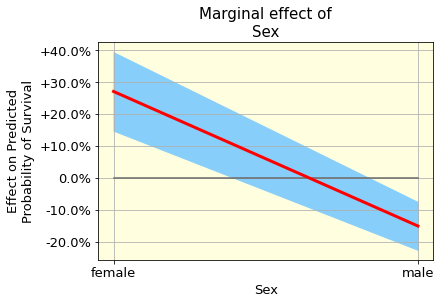

In [29]:
dp = partial_deltaprob('Sex', X_all, shap_df, shap_sum, probas_cat, func_shap2probas=intp)

plt.plot([0,len(dp)-1],[0,0],color='dimgray',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.2,.41,.1))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.1%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), dp.index, fontsize=13)
plt.ylabel('Effect on Predicted\nProbability of Survival',fontsize=13)
plt.xlabel('Sex', fontsize=13)
plt.title('Marginal effect of\nSex', fontsize=15)
plt.gca().set_facecolor('lightyellow')
plt.grid(zorder=2)

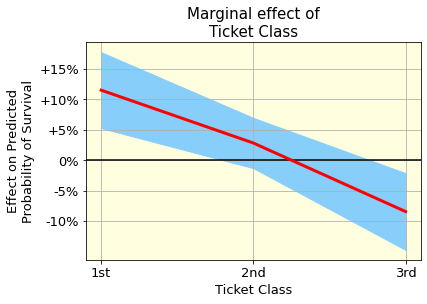

In [30]:
dp = partial_deltaprob('Pclass', X_all, shap_df, shap_sum, probas_cat, func_shap2probas=intp)

plt.axhline(0,color='black',zorder=3)
plt.plot([1,2,3], dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between([1,2,3], dp['mean'] + dp['std'],
                        dp['mean'] - dp['std'],
                        color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.1,.16,.05))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.0%}'.format(y) for y in yticks], fontsize=13)
plt.xticks([1,2,3], ['1st','2nd','3rd'], fontsize=13)
plt.ylabel('Effect on Predicted\nProbability of Survival',fontsize=13)
plt.xlabel('Ticket Class', fontsize=13)
plt.title('Marginal effect of\nTicket Class', fontsize=15)
plt.gca().set_facecolor('lightyellow')
plt.grid(zorder=2)

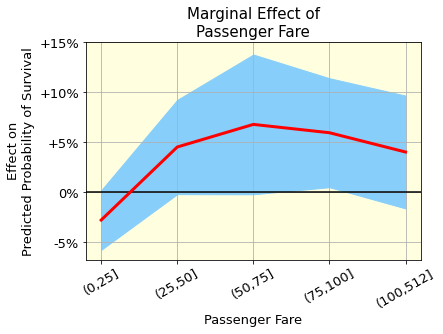

In [31]:
dp = partial_deltaprob('Fare', X_all, shap_df, shap_sum, probas_cat, func_shap2probas=intp, 
                               cutoffs = [0,25,50,75,100,X_train['Fare'].max()])

plt.axhline(0,color='black',zorder=3)
plt.plot(range(len(dp)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(range(len(dp)), dp['mean'] + dp['std'], dp['mean'] - dp['std'],
                 color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = [-.05,0,.05,.1,.15]
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.0%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(range(len(dp)), ['(%s,%s]' %(int(x.left),int(x.right)) for x in dp.index.to_list()], fontsize=13,rotation=30)
plt.ylabel('Effect on\nPredicted Probability of Survival',fontsize=13)
plt.xlabel('Passenger Fare', fontsize=13)
plt.title('Marginal Effect of\nPassenger Fare', fontsize=15)
plt.gca().set_facecolor('lightyellow')
plt.grid(zorder=2)

plt.savefig('fare.png',bbox_inches='tight',dpi=300)

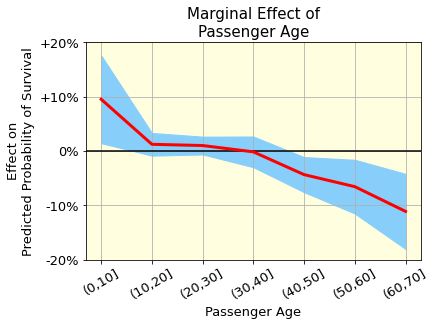

In [32]:
dp = partial_deltaprob('Age', X_all, shap_df, shap_sum, probas_cat, func_shap2probas=intp, cutoffs = list(range(0,75,10)))

plt.axhline(0,color='black',zorder=3)
plt.plot(list(range(7)), dp['mean'], color = 'red', linewidth = 3, label = 'Avg effect',zorder=4)
plt.fill_between(list(range(7)), dp['mean'] + dp['std'],
                        dp['mean'] - dp['std'],
                        color = 'lightskyblue', label = 'Avg effect +- StDev',zorder=1)
yticks = list(np.arange(-.2,.21,.1))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.0%}'.format(y) for y in yticks], fontsize=13)
plt.xticks(list(range(7)), ['(%s,%s]' %(int(x.left),int(x.right)) for x in dp.index], fontsize=13,rotation=30)
plt.ylabel('Effect on\nPredicted Probability of Survival',fontsize=13)
plt.xlabel('Passenger Age', fontsize=13)
plt.title('Marginal Effect of\nPassenger Age', fontsize=15)
plt.gca().set_facecolor('lightyellow')
plt.grid(zorder=2)

plt.savefig('age.png',bbox_inches='tight',dpi=300)

### Interaction plot

In [33]:
temp = pd.DataFrame(shap_df[['Pclass','Fare']].sum(axis=1))
temp.columns = ['deltaprob']
temp = probas_cat - (shap_sum - temp['deltaprob']).apply(intp)
temp = pd.concat([X_all[['Pclass','Fare']],temp],axis=1)
temp['Fare'] = pd.cut(temp['Fare'],[0,25,50,75,100,513])
bi = temp.groupby(['Pclass','Fare']).describe()[0].iloc[:,:3]

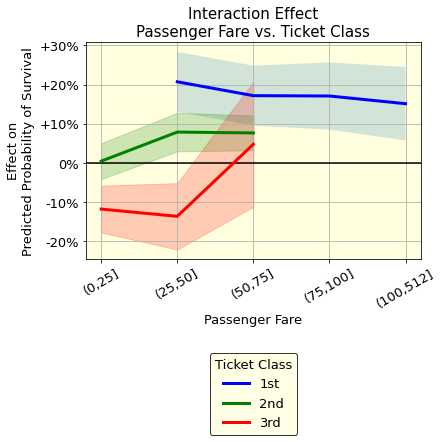

In [34]:
sel = [1,2,3,4]
temp = bi.loc['1',['mean','std']].iloc[sel,:]
plt.plot(sel,temp['mean'],linewidth = 3,label='1st',zorder=4,color='blue')
plt.fill_between(sel, temp['mean'] + temp['std'], temp['mean'] - temp['std'],
                 zorder=1,alpha=.2)

sel = [0,1,2]
temp = bi.loc['2',['mean','std']].iloc[sel,:]
plt.plot(sel,temp['mean'],linewidth = 3,label='2nd',zorder=4,color='green')
plt.fill_between(sel, temp['mean'] + temp['std'], temp['mean'] - temp['std'],
                 zorder=1,color='green',alpha=.2)

sel = [0,1,2]
temp = bi.loc['3',['mean','std']].iloc[sel,:]
plt.plot(sel,temp['mean'],linewidth = 3,label='3rd',zorder=4,color='red')
plt.fill_between(sel, temp['mean'] + temp['std'], temp['mean'] - temp['std'],
                 zorder=1,color='red',alpha=.2)

plt.axhline(0,color='black',zorder=3)
yticks = list(np.arange(-.2,.31,.1))
plt.yticks(yticks, [('+' if y > 0 else '') + '{0:.0%}'.format(y) for y in yticks], fontsize=13)
plt.ylabel('Effect on\nPredicted Probability of Survival',fontsize=13)
xticks=['(0,25]','(25,50]','(50,75]','(75,100]','(100,512]']
plt.xticks(range(len(xticks)),xticks,fontsize=13,rotation=30)
plt.xlabel('Passenger Fare', fontsize=13)
plt.title('Interaction Effect\nPassenger Fare vs. Ticket Class', fontsize=15)
plt.gca().set_facecolor('lightyellow')
plt.grid(zorder=2)

legend = plt.legend(title='Ticket Class',bbox_to_anchor=(0.5, -.4), loc = 'upper center',fontsize=13, title_fontsize= 13)
frame = legend.get_frame()
frame.set_facecolor('lightyellow')
frame.set_edgecolor('black')

plt.savefig('fare_class.png',bbox_inches='tight',dpi=300)